In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/test-file/tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
cat_cols=['Sex','Embarked']

#### Missing Values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Imputing the values

In [9]:
# We can remove the rows that contains the null values
# We can impute the value by 0 or by mean (average) of the column (alter the distribution)
# We can perform KNN Imputing
# We can perfom an iterative Imputing
# but here we will use the mean imputation

In [10]:
# df['Age']=df['Age'].replace({np.nan:np.mean(df['Age'])})
# df['Fare']=df['Fare'].replace({np.nan:np.mean(df['Fare'])}) # we can also use these but most simple ones are
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [12]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [13]:
df[['Age','Fare']].describe()

,Age,Fare
count,418.000000,418.000000
mean,30.272590,35.627188
std,12.634534,55.840500
min,0.170000,0.000000
25%,23.000000,7.895800
50%,30.272590,14.454200
75%,35.750000,31.500000
max,76.000000,512.329200


In [14]:
# lets print the unique values in each categorical columns
for col in cat_cols:
    print(f'Column {col}: {df[col].unique()}')

Column Sex: ['male' 'female']
Column Embarked: ['Q' 'S' 'C']


## EDA

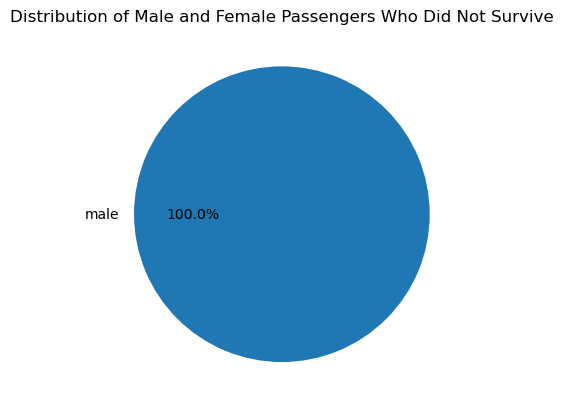

In [15]:
plt.pie(df[df['Survived']==0]['Sex'].value_counts(), labels=df[df['Survived']==0]['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Male and Female Passengers Who Did Not Survive')
plt.show()


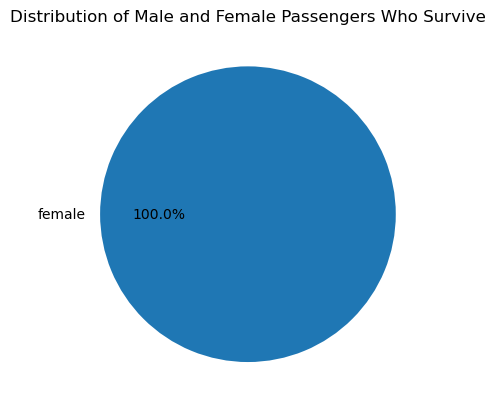

In [16]:
plt.pie(df[df['Survived']==1]['Sex'].value_counts(), labels=df[df['Survived']==1]['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Male and Female Passengers Who Survive')
plt.show()

## First Clue from dataset: Dataset is << biased >>

### In which all the men didnt survive and all the women survived

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Age', ylabel='Sex'>

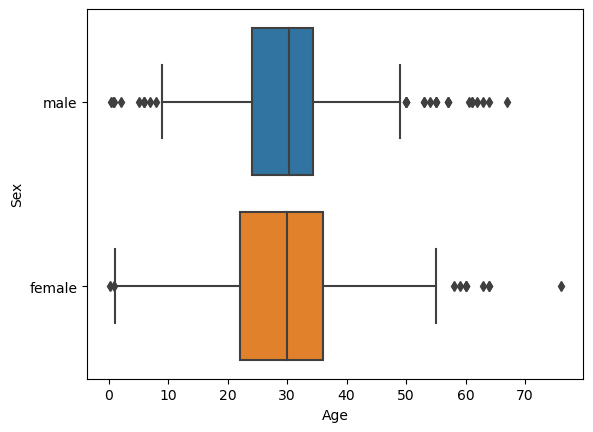

In [17]:
import seaborn as sns
sns.boxplot(x='Age',y='Sex',data=df)

## 2nd Intution from Data: There are many outliers but we cant remove them because dataset is very small
## and secondly there are person whose age are "0" but we know no one can have age zero so we will remove those

<Axes: xlabel='Survived', ylabel='Age'>

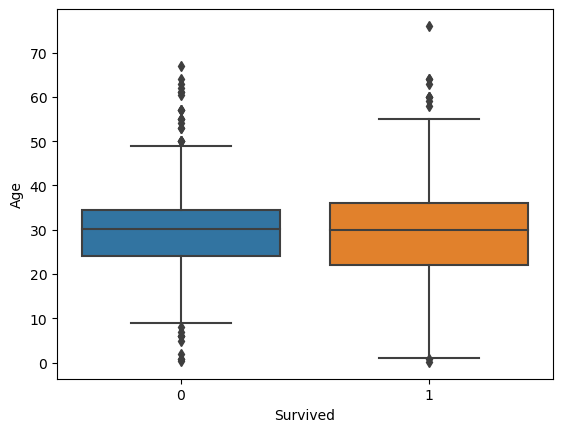

In [18]:
sns.boxplot(x='Survived',y='Age',data=df)

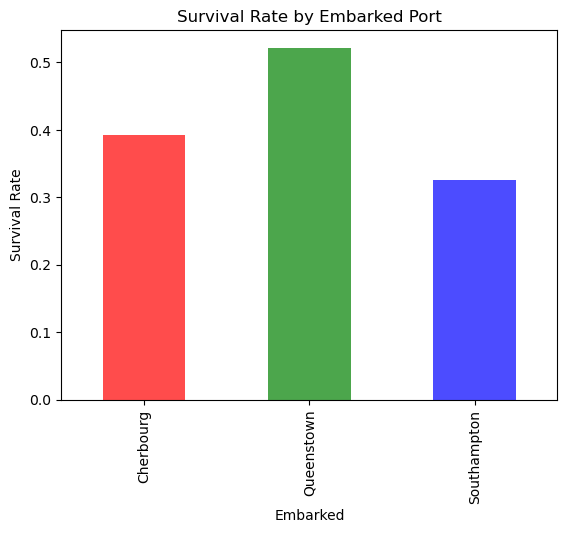

In [19]:
embarked_survival = df.groupby('Embarked')['Survived'].mean()
ax = embarked_survival.plot(kind='bar', color=['red', 'green', 'blue'], alpha=0.7)
ax.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Embarked Port')
plt.show()

## Findings : 
#### 1: Data is biased but here we are nothing about it
#### 2: Data has age==0 so we have to remove it

In [20]:
df[df['Age'] < df['Age'].quantile(0.25)]['Age'].value_counts()

21.00    17
22.00    16
18.00    13
20.00     8
17.00     7
19.00     4
6.00      3
13.00     3
1.00      3
18.50     3
10.00     2
14.00     2
9.00      2
12.00     2
8.00      2
16.00     2
2.00      2
7.00      1
15.00     1
11.50     1
0.33      1
0.92      1
22.50     1
0.75      1
0.83      1
0.17      1
14.50     1
5.00      1
3.00      1
Name: Age, dtype: int64

In [21]:
# we can simple remove the rows with value 0
df.drop(df[df['Age'] < 1].index, inplace=True)

In [22]:
df['Age'].quantile(0.25)

23.0

<Axes: xlabel='Survived', ylabel='Age'>

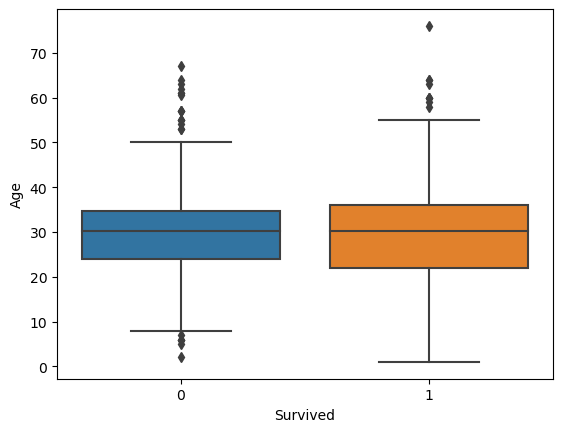

In [23]:
sns.boxplot(x='Survived',y='Age',data=df)

In [24]:
df[df['Age'] < df['Age'].quantile(0.25)]['Age'].value_counts()

21.0    17
22.0    16
18.0    13
20.0     8
17.0     7
19.0     4
18.5     3
13.0     3
6.0      3
1.0      3
16.0     2
8.0      2
12.0     2
2.0      2
14.0     2
10.0     2
9.0      2
7.0      1
15.0     1
11.5     1
22.5     1
14.5     1
5.0      1
3.0      1
Name: Age, dtype: int64

# Converting categorical columns to numerical because machine learning model uses numerical data

In [25]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [26]:
df['Embarked']=df['Embarked'].map({'C':0,'S':1,'Q':2})

In [27]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1


In [29]:
x=df.drop(['Cabin','PassengerId','Survived','Ticket','Name'],axis=1)
y=df['Survived']

# Splitting the data set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.9)

In [32]:
print(x_train.shape)
print(x_test.shape)

(371, 7)
(42, 7)


# Importing Classifiers

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Instantiating the Models

In [34]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [35]:
algos={
    'SVC':svc,
    'KNC':knc,
    'LR':lr,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'XGB':xgb,
    'BC':bc,
    'ETC':etc
}

# Importing metrics to evaluate the model

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [37]:
pre_acc = {}
for name,algo in algos.items():
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    pre_acc[name] = {
        'Precision': precision_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
pre_acc

{'SVC': {'Precision': 0.0,
  'Accuracy': 0.7619047619047619,
  'Confusion Matrix': array([[32,  0],
         [10,  0]])},
 'KNC': {'Precision': 0.4444444444444444,
  'Accuracy': 0.7380952380952381,
  'Confusion Matrix': array([[27,  5],
         [ 6,  4]])},
 'LR': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[32,  0],
         [ 0, 10]])},
 'DTC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[32,  0],
         [ 0, 10]])},
 'RFC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[32,  0],
         [ 0, 10]])},
 'ABC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[32,  0],
         [ 0, 10]])},
 'XGB': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[32,  0],
         [ 0, 10]])},
 'BC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[32,  0],
         [ 0, 10]])},
 'ETC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[32,  0],
         [ 0, 10

# We can use any algorithm from LR,DTC,RFC,ABC,XGB,BC,ETC/

### Lets test for our own data using Random Forest

In [39]:
print(f'Accuracy:{accuracy_score(y_test,rfc.predict(x_test))}, Precision: {precision_score(y_test,rfc.predict(x_test))}')

Accuracy:1.0, Precision: 1.0


In [40]:
df[df['Survived']==1]['Sex'].unique() # Another way of seeing that data is biased

array([1])

### Our model is perfoming well but lets see with normalization because our datapoints like in Age column and Fare column have far distances if we plot them in 2D Plane

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[['Age', 'Fare']] = scaler.fit_transform(x_train[['Age', 'Fare']])
x_test[['Age','Fare']]=scaler.transform(x_test[['Age', 'Fare']])

In [42]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [43]:
print(f'Accuracy:{accuracy_score(y_test,rfc.predict(x_test))}, Precision: {precision_score(y_test,rfc.predict(x_test))}')

Accuracy:1.0, Precision: 1.0


### We have seen there is no affect on the precision and accuracy 